#Tittle : Building a Personalized Content-Based Recommendation System for Netflix Users"



Problem Statement:
Netflix offers a massive library of shows and movies, which often leads to content overload for users. This project aims to build a content-based recommender system that suggests movies/TV shows similar to a selected title based on genre, description, director, and cast using Natural Language Processing (NLP) techniques.

##Step 1: Load the Dataset

In [ ]:
import pandas as pd

In [ ]:
# Step 1: Upload CSV file
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
# Read the uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

In [ ]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##Step 2:View shape


In [ ]:
print("Shape:", df.shape)

Shape: (8807, 12)


##Step 3 :column info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##Step 4:displaying the missing values

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#Data cleaning

In [ ]:
df.drop_duplicates(inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


 ## Step 1:Handle missing values
Drop rows where description is missing (essential for NLP)

Fill missing cast, director with "Unknown"

In [ ]:
df = df.dropna(subset=['description'])

df['cast'] = df['cast'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##Step 2:Convert date_added to datetime

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


#Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


In [ ]:
# Separate duration into numeric and unit
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)', expand=False)


##Create a combined text feature for NLP
Combine useful text columns into one:

In [ ]:
df['combined'] = (
    df['title'] + ' ' +
    df['director'] + ' ' +
    df['cast'] + ' ' +
    df['listed_in'] + ' ' +
    df['description']
)


##Encode type (Movie/TV Show)

In [ ]:
df['type_encoded'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)


#Final Checks

In [ ]:
# Check final shape and columns
print("Final Shape:", df.shape)
df[['title', 'type', 'country', 'rating', 'duration', 'year_added']].head()


Final Shape: (8807, 17)


,title,type,country,rating,duration,year_added
0,Dick Johnson Is Dead,Movie,United States,PG-13,90 min,2021.0
1,Blood & Water,TV Show,South Africa,TV-MA,2 Seasons,2021.0
2,Ganglands,TV Show,Unknown,TV-MA,1 Season,2021.0
3,Jailbirds New Orleans,TV Show,Unknown,TV-MA,1 Season,2021.0
4,Kota Factory,TV Show,India,TV-MA,2 Seasons,2021.0


#Data visualization
Top 10 Countries with Most Netflix Content


# model building

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-52-3397080693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


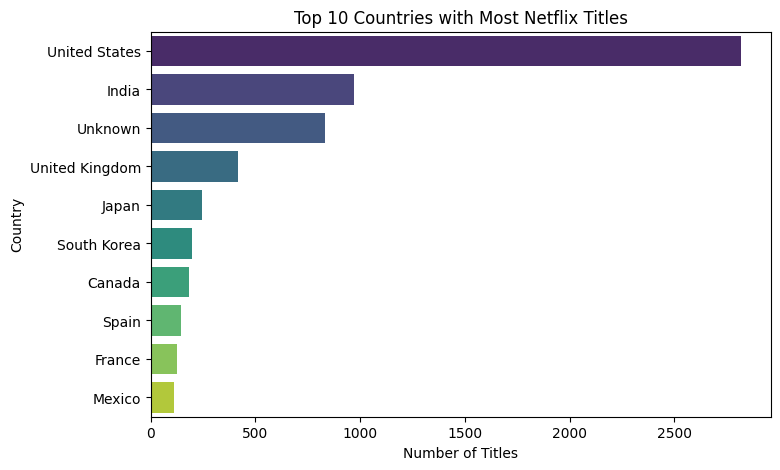

In [ ]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()



/tmp/ipython-input-53-2492711026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


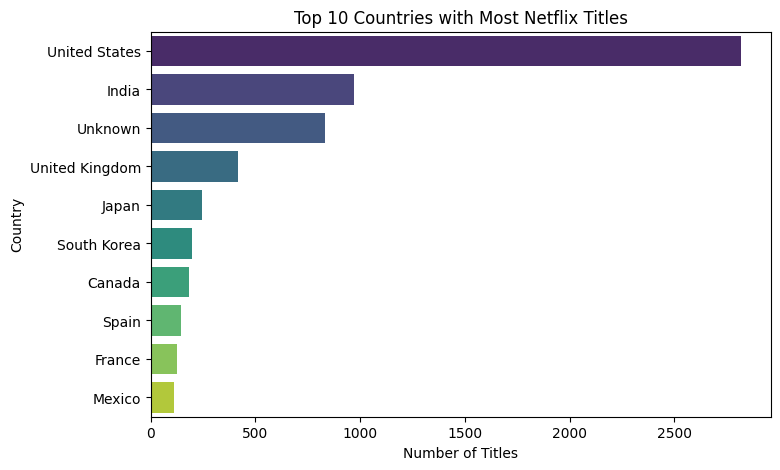

In [ ]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


Content Type Distribution (Movies vs TV Shows)


/tmp/ipython-input-54-4088070416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


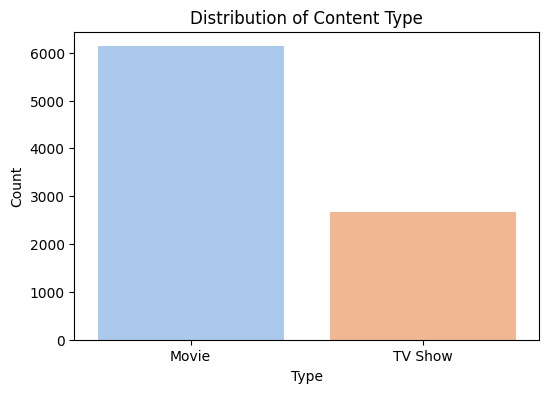

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


Content Added Over the Years

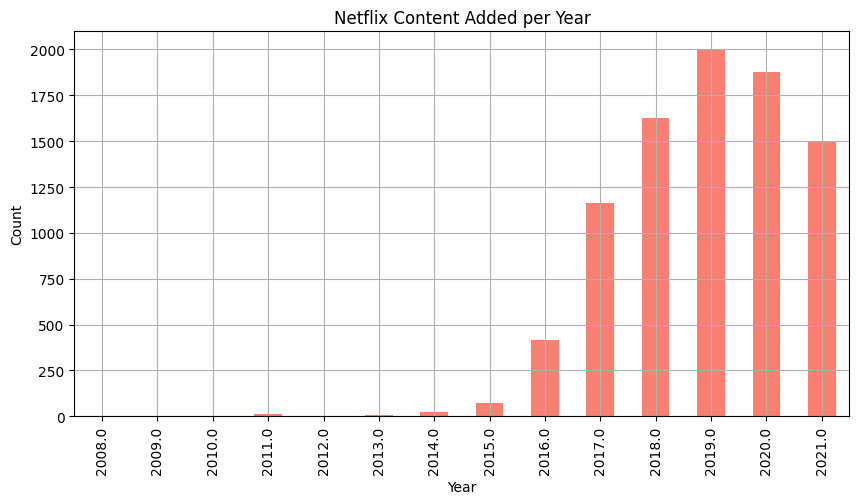

In [ ]:
plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title("Netflix Content Added per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


Cleaned and structured

Text data is ready for NLP

Numerical and categorical features extracted

Ready for building recommendation or classification models

----x------x------x-----x-----x----x-----x------x-----x------

#

##Model building

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


##TF-IDF Vectorization

In [ ]:
# Convert text to TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])

print("TF-IDF shape:", tfidf_matrix.shape)


TF-IDF shape: (8807, 52938)


##Cosine Similarity Matrix

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


Index Mapping for Titles

In [ ]:
# Reset index and map title to index for lookup
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'].str.lower())


##Recommendation Function

In [ ]:
def recommend(title, cosine_sim=cosine_sim):
    title = title.lower()
    if title not in indices:
        return "Title not found in dataset."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]  # top 5
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]


##Test the Recommender

In [ ]:
recommend("Narcos")


,title
3298,Wild District
2921,Narcos: Mexico
6672,El Cartel
1268,El final del paraíso
2134,The Great Heist


#Model building for Logistic Regression
Text Preprocessing

In [ ]:
import re
from sklearn.model_selection import train_test_split

# Clean text
df['description'] = df['description'].str.lower()
df['description'] = df['description'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Choose only one genre (first one)
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())


##TF-IDF Vectorization




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['description'])

# Target
y = df['genre']


##  Train/Test Split



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Train Model (Logistic Regression)
python



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

##Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.41430192962542567

Classification Report:
                               precision    recall  f1-score   support

          Action & Adventure       0.46      0.53      0.49       172
              Anime Features       0.00      0.00      0.00         3
                Anime Series       0.00      0.00      0.00        39
            British TV Shows       0.50      0.06      0.10        52
    Children & Family Movies       0.53      0.34      0.41       122
           Classic & Cult TV       0.00      0.00      0.00         3
              Classic Movies       0.00      0.00      0.00        20
                    Comedies       0.34      0.51      0.41       231
              Crime TV Shows       0.32      0.08      0.13        89
                 Cult Movies       0.00      0.00      0.00         6
               Documentaries       0.48      0.70      0.57       151
                  Docuseries       0.56      0.10      0.17        51
                      Dramas      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Predict on New Description

In [ ]:
desc = ["A story of love and war in medieval times with knights and kingdoms"]
desc_tfidf = tfidf.transform(desc)
print("Predicted Genre:", model.predict(desc_tfidf)[0])


Predicted Genre: Dramas


In [ ]:
# Example: New Netflix-like descriptions
new_descriptions = [
    "A young woman discovers she has magical powers and must protect her kingdom.",
    "A hilarious journey of three friends who start a food truck business in a busy city.",
    "A deep dive into climate change and its impact on Arctic wildlife.",
    "An agent must go undercover in the world of high-stakes poker to expose a crime syndicate.",
    "Children embark on an animated adventure to find a missing treasure in the jungle."
]

# Transform the descriptions using the same TF-IDF vectorizer
new_tfidf = tfidf.transform(new_descriptions)

# Predict genres using the trained model
predicted_genres = model.predict(new_tfidf)

# Display predictions
for desc, genre in zip(new_descriptions, predicted_genres):
    print(f"\n📝 Description:\n{desc}\n🎬 Predicted Genre: {genre}")



📝 Description:
A young woman discovers she has magical powers and must protect her kingdom.
🎬 Predicted Genre: Children & Family Movies

📝 Description:
A hilarious journey of three friends who start a food truck business in a busy city.
🎬 Predicted Genre: International TV Shows

📝 Description:
A deep dive into climate change and its impact on Arctic wildlife.
🎬 Predicted Genre: Documentaries

📝 Description:
An agent must go undercover in the world of high-stakes poker to expose a crime syndicate.
🎬 Predicted Genre: Action & Adventure

📝 Description:
Children embark on an animated adventure to find a missing treasure in the jungle.
🎬 Predicted Genre: Children & Family Movies


# creating pickle file

In [ ]:
# Save model and vectorizer
import joblib
joblib.dump(model, 'genre_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']